In [1]:
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import matplotlib.colors as mcolors

font_dirs = ['Lato']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'Lato'

pd.set_option('display.float_format', '{:.5f}'.format)

colors = ['#006451', '#4b917d', '#1DB954', '#99FFB9']

%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('spotify.csv', encoding='latin1')
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.40000,"390,470,936","30,716","196,631,588",...,684,62.00000,"17,598,718",114.00000,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.90000,"323,703,884","28,113","174,597,137",...,3,67.00000,"10,422,430",111.00000,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.40000,"601,309,283","54,331","211,607,669",...,536,136.00000,"36,321,847",172.00000,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.90000,"2,031,280,633","269,802","136,569,078",...,"2,182",264.00000,"24,684,248",210.00000,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.30000,"107,034,922","7,223","151,469,874",...,1,82.00000,"17,660,624",105.00000,"4,493,884","7,006","207,179","457,017",NaN,1


In [3]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
new_col = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts']
df[new_col] = df[new_col].replace(',', '', regex=True).apply(pd.to_numeric)
df['All Time Rank'] = pd.to_numeric(df['All Time Rank'].replace(',', '', regex=True), downcast='integer')
df['Explicit Track'] = df['Explicit Track'].replace({0: False, 1: True}).astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4595 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   int16         
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4487 non-null   float64       
 8   Spotify Playlist Count      4530 non-null   float64       
 9   Spotify Playlist Reach      4528 non-null   float64       
 10  Spotify Popularity          3796 non-null   float64       
 11  YouTube Views               4292 non-null   float64     

/var/folders/z4/gtdvl2k50kx0r_klc4vgllkh0000gn/T/ipykernel_16111/3945019587.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Explicit Track'] = df['Explicit Track'].replace({0: False, 1: True}).astype('category')


In [4]:
df = df.fillna(np.nan)
df_spotify = df.drop(columns=['TIDAL Popularity', 'Explicit Track', 'AirPlay Spins', 
                              'SiriusXM Spins', 'Deezer Playlist Count', 
                              'Deezer Playlist Reach', 'Amazon Playlist Count', 
                              'Pandora Streams', 'Pandora Track Stations', 
                              'Soundcloud Streams']).copy()
df_spotify.head(20)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Shazam Counts
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.40000,390470936.00000,30716.00000,196631588.00000,92.00000,84274754.00000,1713126.00000,5767700.00000,651565900.00000,5332281936.00000,150597040.00000,210.00000,2669262.00000
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.90000,323703884.00000,28113.00000,174597137.00000,92.00000,116347040.00000,3486739.00000,674700.00000,35223547.00000,208339025.00000,156380351.00000,188.00000,1118279.00000
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.40000,601309283.00000,54331.00000,211607669.00000,92.00000,122599116.00000,2228730.00000,3025400.00000,275154237.00000,3369120610.00000,373784955.00000,190.00000,5285340.00000
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.90000,2031280633.00000,269802.00000,136569078.00000,85.00000,1096100899.00000,10629796.00000,7189811.00000,1078757968.00000,14603725994.00000,3351188582.00000,394.00000,11822942.00000
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.30000,107034922.00000,7223.00000,151469874.00000,88.00000,77373957.00000,3670188.00000,16400.00000,NaN,NaN,112763851.00000,182.00000,457017.00000
5,Lovin On Me,Lovin On Me,Jack Harlow,2023-11-10,USAT22311371,6,410.10000,670665438.00000,105892.00000,175421034.00000,83.00000,131148091.00000,1392593.00000,4202367.00000,214943489.00000,2938686633.00000,2867222632.00000,138.00000,4517131.00000
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,USWB12307016,7,407.20000,900158751.00000,73118.00000,201585714.00000,86.00000,308723145.00000,4120760.00000,NaN,29584940.00000,534915313.00000,4601579812.00000,280.00000,9990302.00000
7,Gata Only,Gata Only,FloyyMenor,2024-02-02,QZL382406049,8,375.80000,675079153.00000,40094.00000,211236940.00000,92.00000,228382568.00000,1439495.00000,3500000.00000,338546668.00000,3804584163.00000,2112581620.00000,160.00000,6063523.00000
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,2024-06-09,TCJPA2463708,9,355.70000,1653018119.00000,1.00000,15.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,2024-05-23,USSM12404354,10,330.60000,90676573.00000,10400.00000,184199419.00000,86.00000,32735244.00000,988682.00000,325800.00000,121574500.00000,974656200.00000,174706874.00000,191.00000,666302.00000


In [5]:
# Check the duplicate
dublicated_rows = pd.DataFrame(df_spotify.duplicated()).rename(columns = {0:'duplicated_rows'})
dublicated_rows[dublicated_rows['duplicated_rows']==True]

,duplicated_rows
2450,True
3450,True


In [6]:
# drop the duplicate rows
df_spotify.drop_duplicates(keep='first',inplace=True)
df_spotify.duplicated().sum()

0

In [7]:
names = ['All Time Rank', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 
      'TikTok Views', 
       'Apple Music Playlist Count', 'Shazam Counts']

C = df_spotify[names].corr()
n =len(names)

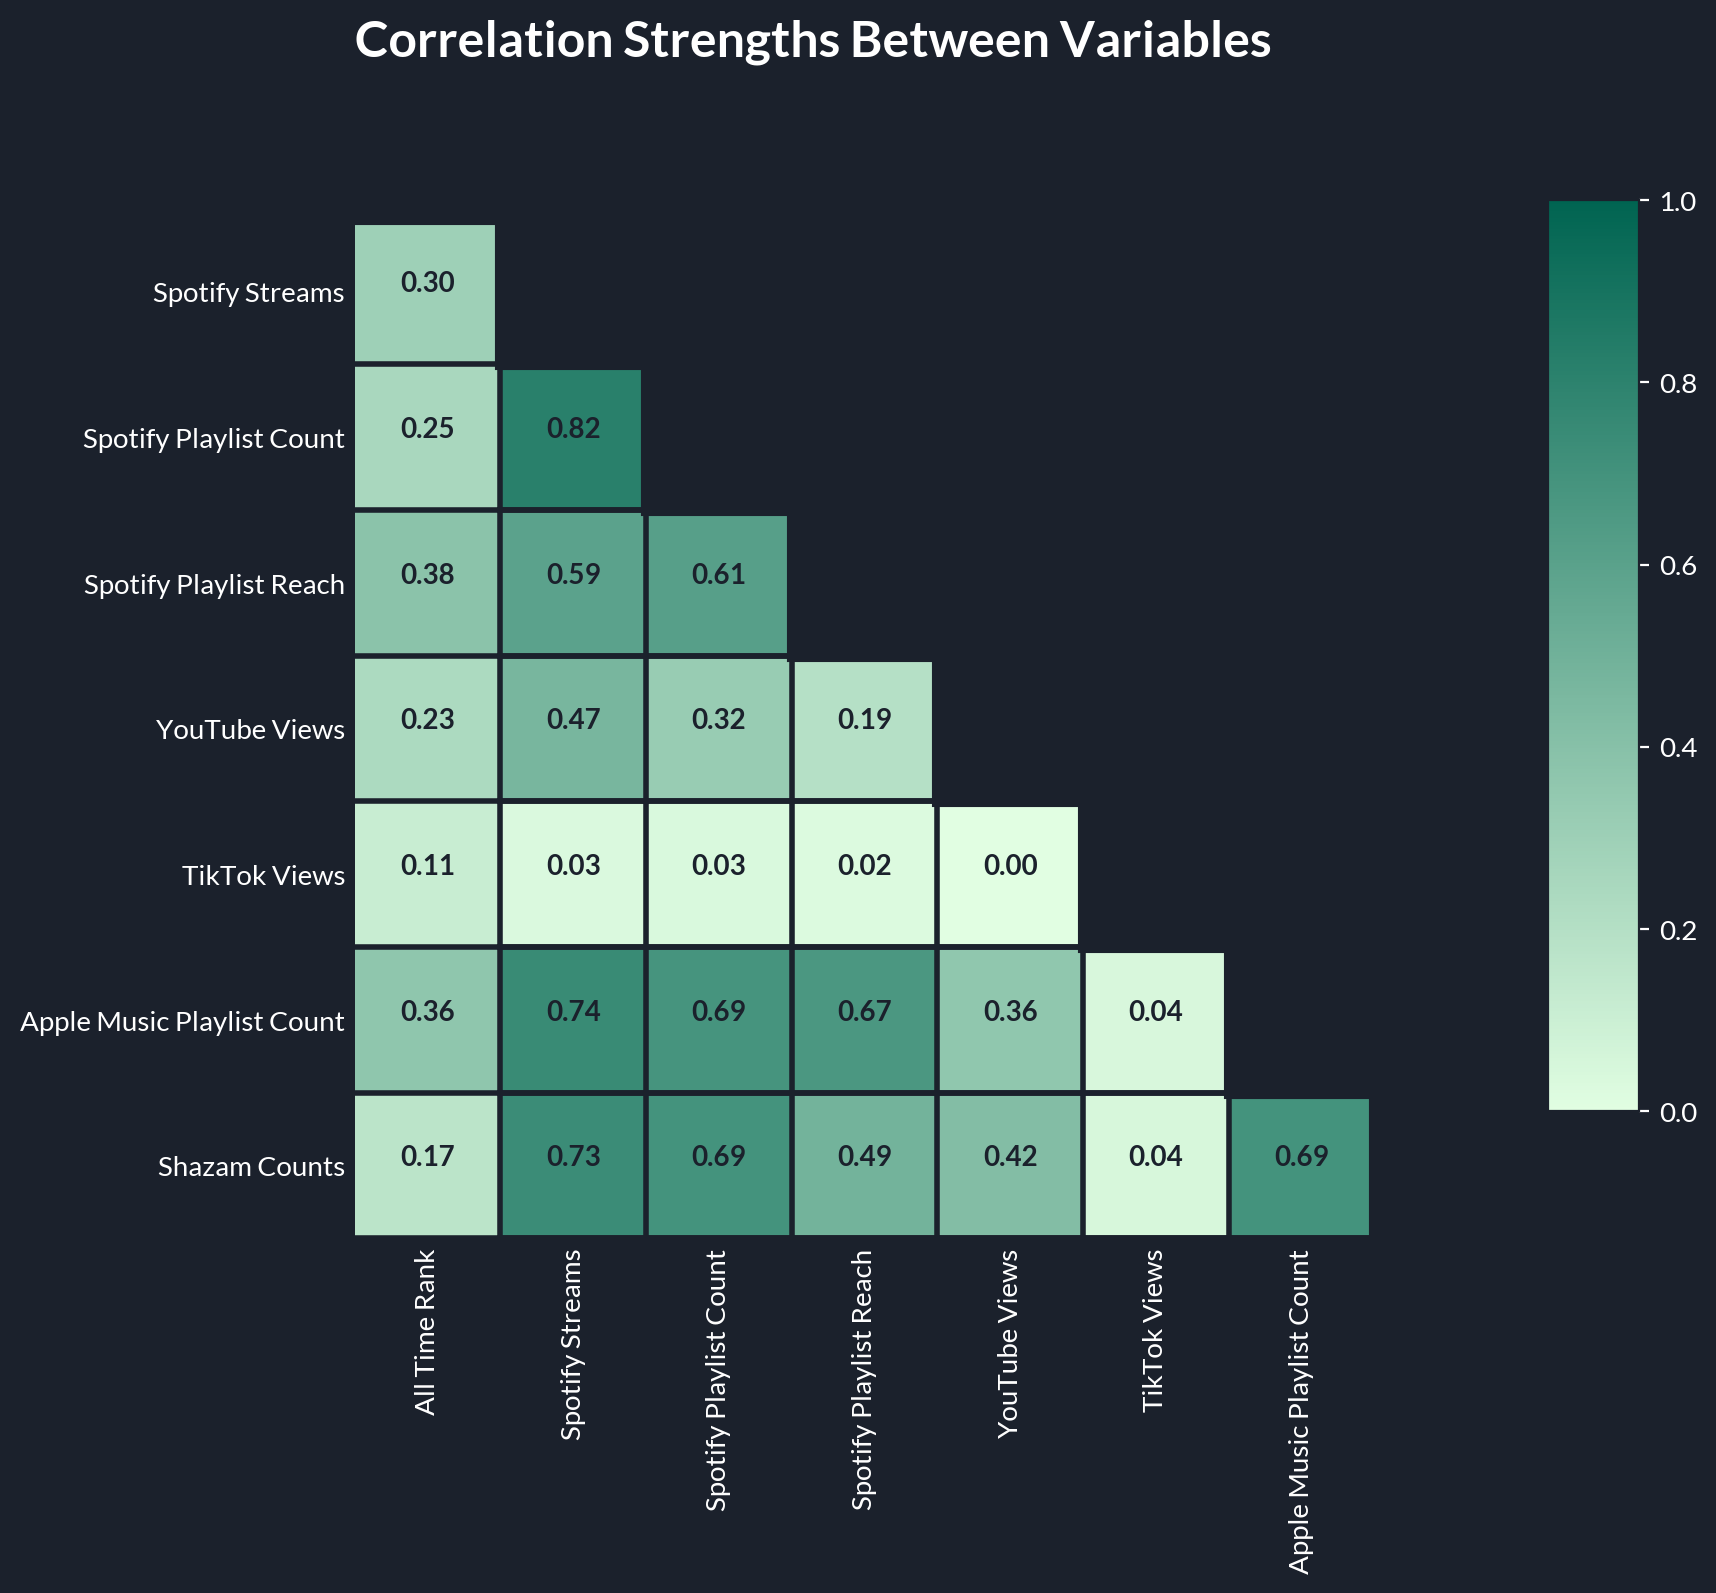

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Take the absolute value of the correlation matrix to ensure positive values
C = np.abs(C)
colors = ['#e1fee2', '#006451']  # Start from dark green to white 
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_greens", colors)
# Use imshow to display the lower triangle of the matrix with a custom colormap
im = ax.imshow(np.tril(C), cmap=custom_cmap, vmin=0, vmax=1)

# Add correlation values as text to each box (lower triangle only)
n = C.shape[0]
for i in range(n):
    for j in range(n):
        if i > j:
            ax.text(j, i, f"{C.iloc[i, j]:.2f}", horizontalalignment='center', 
                    color='#1B212C', weight='bold')

# Set the location and labels of the x and y axes
ax.set_xticks(range(n-1))
ax.set_xticklabels(list(C.columns[:-1]), rotation=90, color='white')
ax.set_yticks(range(n))
ax.set_yticklabels([''] + list(C.columns[1:]), color='white')

# Add a color bar to indicate the value-color map with smaller size
cbar = fig.colorbar(im, ax=ax, shrink=0.6, aspect=10, pad=0.02)
cbar.ax.yaxis.set_tick_params(color='white')  # Set tick color
cbar.ax.yaxis.set_tick_params(labelcolor='white')  # Set label color
cbar.outline.set_edgecolor('#1B212C') 

# Hide the upper triangle grid
for i in range(n):
    for j in range(n):
        if i <= j:
            ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False))
# Change the color of the upper triangle to match the background
for i in range(n):
    for j in range(n):
        if i <= j:
            ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=True, edgecolor='#1B212C', lw=4, facecolor='#1B212C'))
# add lines
for i in range(1, n ):
    for j in range(i):
        ax.plot([j-0.5, j+1.5], [i+0.5, i+0.5], color='#1B212C', lw=2) # Horizontal line
        ax.plot([j+0.5, j+0.5], [i-0.5, i+0.5], color='#1B212C', lw=2)  # Vertical line

# Set the background color for the plot and figure
ax.set_facecolor('#1B212C')
fig.patch.set_facecolor('#1B212C')

# Adjust the color of the axis spines
ax.spines['top'].set_color('#1B212C')
ax.spines['right'].set_color('#1B212C')
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_tick_params(length=0)
ax.yaxis.set_tick_params(length=0)

# Add title 
ax.set_title('Correlation Strengths Between Variables', fontsize=18,  color = 'white', weight = 'bold', loc = 'left')

plt.tight_layout()
plt.show()
